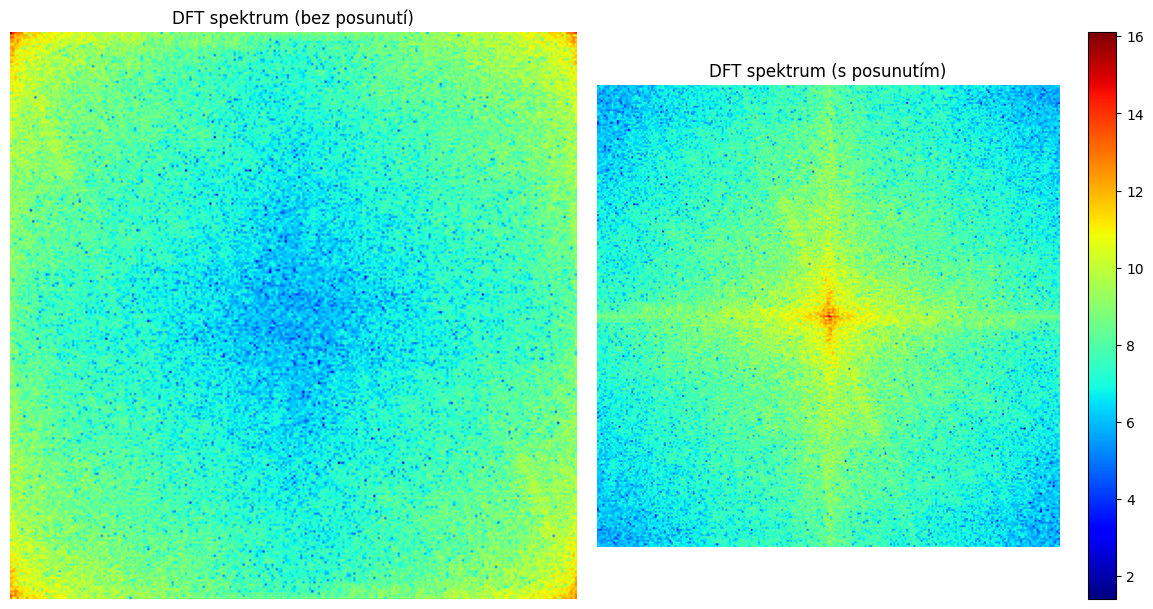

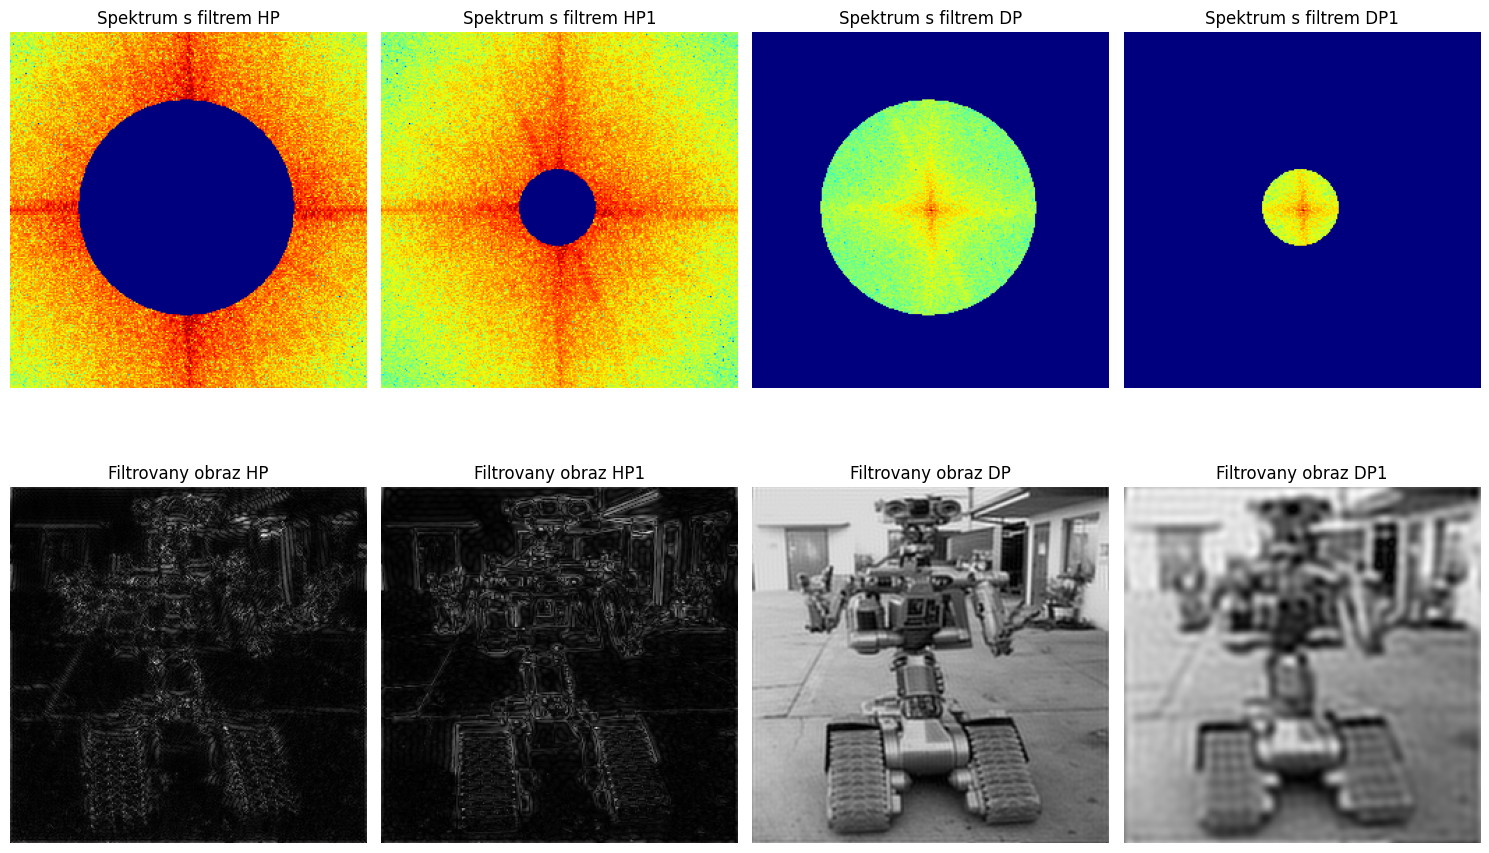

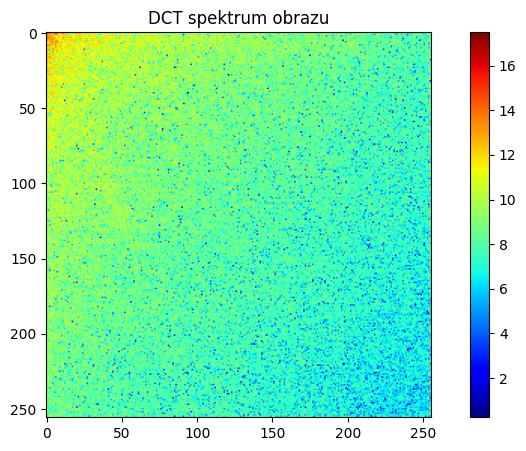

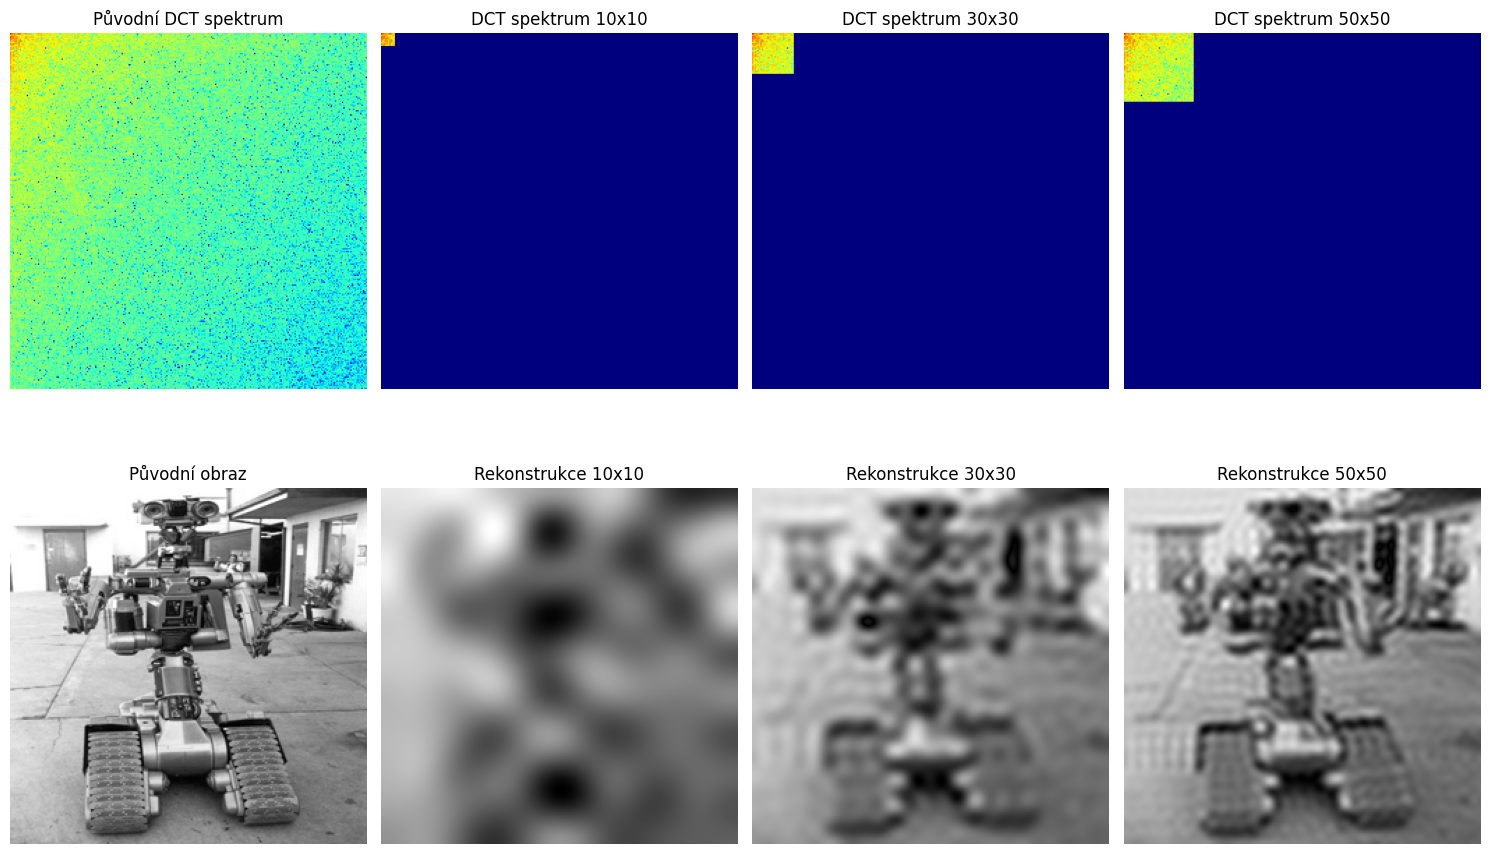

In [5]:
# made by Martin "Granc3k" Šimon, Jakub "Parrot2" Keršláger
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dctn, idctn
from PIL import Image

# Setnutí defaultní cmapy pro matplotlib
plt.rcParams["image.cmap"] = "jet"

# Load rob ot obrázku
image_path = "./data/cv04c_robotC.bmp"
image = Image.open(image_path).convert("L")  # Transfer na odstíny šedi
gray = np.array(image)

# Define listu velikostí DCT výřezů
sizes = [10, 30, 50]

# Task 1: Calc 2D DFT a print amplitudového spektra
fft2 = np.fft.fft2(gray)
fft2_unshifted = np.fft.fft2(gray)
fft2_shifted = np.fft.fftshift(fft2)

# Print obou spekter - před a po posunutí kvadrantů
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(np.log(np.abs(fft2_unshifted) + 1))
axes[0].set_title("DFT spektrum (bez posunutí)")
axes[0].axis("off")

axes[1].imshow(np.log(np.abs(fft2_shifted) + 1))
axes[1].set_title("DFT spektrum (s posunutím)")
axes[1].axis("off")

plt.colorbar(axes[1].imshow(np.log(np.abs(fft2_shifted) + 1)), ax=axes[1])
plt.tight_layout()
plt.show()


# Task 2: Aplikace filtrů v frekvenční doméně
# Load filtrů jako matice 0 a 1
def load_filter_image(image_path):
    img = Image.open(image_path).convert("L")
    binary_filter = np.array(img) > 128  # Prahování - binární masky
    return binary_filter.astype(float)  # Převod na hodnoty 0 a 1


# Load filtrů
filters = {
    "HP": load_filter_image("./data/cv04c_filtHP.bmp"),
    "HP1": load_filter_image("./data/cv04c_filtHP1.bmp"),
    "DP": load_filter_image("./data/cv04c_filtDP.bmp"),
    "DP1": load_filter_image("./data/cv04c_filtDP1.bmp"),
}

# Aplikace filtrů a back transformace
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, (name, mask) in enumerate(filters.items()):
    fft_filtered = np.fft.fft2(gray) * np.fft.ifftshift(mask)  # Aplikace filtru
    fft_filtered_shifted = np.fft.fftshift(fft_filtered)
    img_filtered = np.abs(np.fft.ifft2(fft_filtered))

    axes[0, i].imshow(np.log(np.abs(fft_filtered_shifted) + 1))
    axes[0, i].set_title(f"Spektrum s filtrem {name}")
    axes[0, i].axis("off")

    axes[1, i].imshow(img_filtered, cmap="gray")
    axes[1, i].set_title(f"Filtrovany obraz {name}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

# Task 3: Calc DCT spektra
dctS = dctn(gray)

# Print DCT spektra
plt.figure(figsize=(10, 5))
plt.title("DCT spektrum obrazu")
plt.imshow(np.log(np.abs(dctS) + 1))
plt.colorbar()
plt.show()

# Task 4: Omezení DCT spektra na různé velikosti a zpětná transformace
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes[0, 0].imshow(np.log(np.abs(dctS) + 1))
axes[0, 0].set_title("Původní DCT spektrum")
axes[0, 0].axis("off")

axes[1, 0].imshow(gray, cmap="gray")
axes[1, 0].set_title("Původní obraz")
axes[1, 0].axis("off")

for i, size in enumerate(sizes):
    dctS_limited = np.zeros_like(dctS)
    dctS_limited[:size, :size] = dctS[:size, :size]

    reconstructed_image = np.abs(idctn(dctS_limited))

    axes[0, i + 1].imshow(np.log(np.abs(dctS_limited) + 1))
    axes[0, i + 1].set_title(f"DCT spektrum {size}x{size}")
    axes[0, i + 1].axis("off")

    axes[1, i + 1].imshow(reconstructed_image, cmap="gray")
    axes[1, i + 1].set_title(f"Rekonstrukce {size}x{size}")
    axes[1, i + 1].axis("off")

plt.tight_layout()
plt.show()